In [1]:
import sys
import os
sys.path.append(os.path.join(os.path.abspath(''), '../'))

from evaluation.evaluation_harness import TrainEvaluator
from pprint import pprint

from dataset.data_loader import DataLoader, playtime_forever_users_games_edge_scoring_function, LinearNormalizer, GaussianNormalizer, PercentileNormalizer, never_remove_edge, remove_zero_playtime_edge
from models.random_model import RandomModel
from models.common_neighbors_model import CommonNeighbors
from models.popularity_model import GamePopularityModel
from models.ncf_model import NCFModel

In [2]:
data_loader = DataLoader(cache_local_dataset=True, users_games_edge_scoring_function = playtime_forever_users_games_edge_scoring_function, user_game_edge_embeddings = ['playtime_forever'], score_normalizers = [GaussianNormalizer(1.0, 1.0)])
data_loader.load_random_edge_train_test_split(train_percentage=0.8, test_percentage=0.2, seed=0)

evaluator = TrainEvaluator(data_loader, top_N_games_to_eval = 500, num_users_to_eval=1000, seed=0, debug=True)

In [3]:
random_model_initializer = lambda: RandomModel()
evaluator.reset(random_model_initializer, network_save_file = 'evaluation_test_random_model')
evaluator.plot_top_N_recall_percentiles(10)
evaluator.plot_log_user_percentile_positional_error()
evaluator.compute_mean_positional_error()
evaluator.compute_top_N_recall(10)
evaluator.plot_roc_curve()
evaluator.compute_auc_roc()
evaluator.plot_user_based_roc_curve()
evaluator.compute_user_based_auc_roc()
print(evaluator.model.name())
pprint(evaluator.metrics)
print()

Loading model: evaluation_test_random_model
Doen loading model. evaluation_test_random_model
Getting predictions.


User Predictions:  12%|█▏        | 123/1000 [00:16<01:57,  7.43it/s]


ArrowInvalid: Not a Feather V1 or Arrow IPC file

In [ ]:
# random
# {'auc_roc': 0.4908035933078027,
#  'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'mean_positional_error': 1.7946016210587437,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'top_10_hit_percentage': 0.0006198907442563249,
#  'top_10_hit_percentage_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'user_based_auc_roc': 0.5088976340854102,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

In [ ]:
random_model_initializer = lambda: GamePopularityModel()
evaluator.reset(random_model_initializer, network_save_file = 'evaluation_test_game_popularity_model')
evaluator.plot_top_N_recall_percentiles(10)
evaluator.plot_log_user_percentile_positional_error()
evaluator.compute_mean_positional_error()
evaluator.compute_top_N_recall(10)
evaluator.plot_roc_curve()
evaluator.compute_auc_roc()
evaluator.plot_user_based_roc_curve()
evaluator.compute_user_based_auc_roc()
print(evaluator.model.name())
pprint(evaluator.metrics)
print()

User Predictions: 100%|██████████| 1000/1000 [20:11<00:00,  1.21s/it]  


Done getting predictions.
Appending dataframe information.
Ranking top N.
Constructing missed edge dataframe.
Ranking missed.
Done getting edge results.
common_neighbors
{'auc_roc': 0.8595736117912485,
 'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'mean_positional_error': 17.369770194193965,
 'roc_figure': <Figure size 640x480 with 1 Axes>,
 'top_10_recall': 0.028220077409240117,
 'top_10_recall_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'user_based_auc_roc': 0.6497260720281892,
 'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}



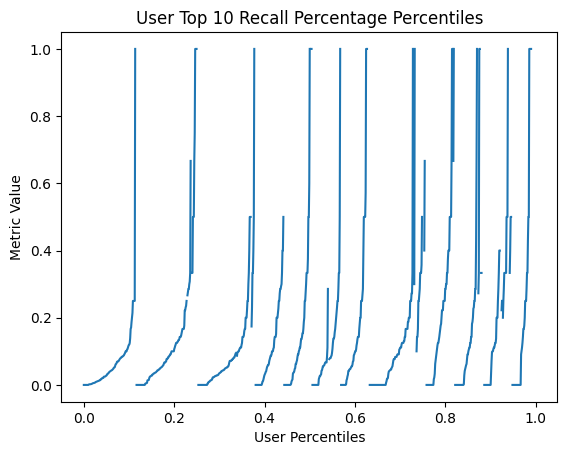

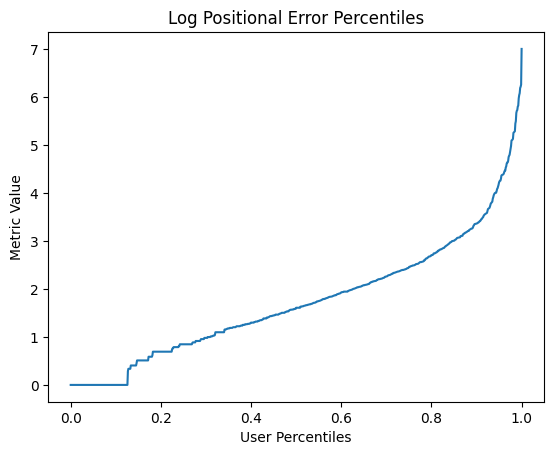

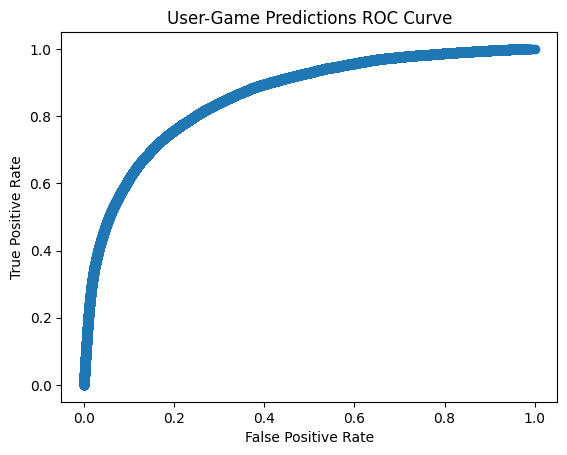

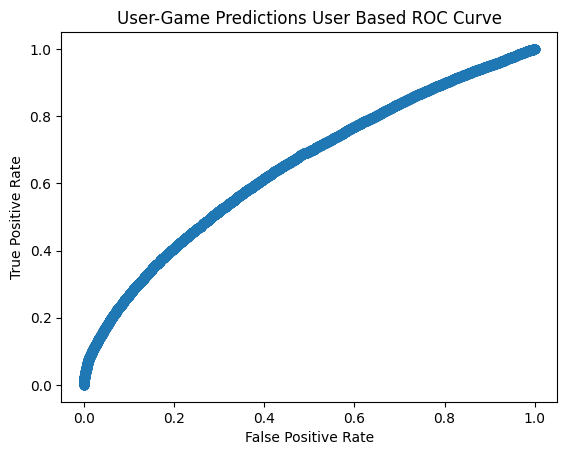

In [3]:
random_model_initializer = lambda: CommonNeighbors()
evaluator.reset(random_model_initializer, network_save_file = 'evaluation_test_common_neighbors_model')
evaluator.plot_top_N_recall_percentiles(10)
evaluator.plot_log_user_percentile_positional_error()
evaluator.compute_mean_positional_error()
evaluator.compute_top_N_recall(10)
evaluator.plot_roc_curve()
evaluator.compute_auc_roc()
evaluator.plot_user_based_roc_curve()
evaluator.compute_user_based_auc_roc()
print(evaluator.model.name())
pprint(evaluator.metrics)
print()

In [ ]:
# collaborative_filtering_model = CollaborativeFiltering(num_epochs = 50, num_user_embedding = 500, num_game_embedding = 500, learning_rate = 1.0, regularization = 0.05, seed = 0)
# collaborative_filtering_model.set_data_loader(data_loader)
# collaborative_filtering_model.train(train_network, debug=True)

# evaluator.reset(collaborative_filtering_model, debug=True)
# evaluator.plot_top_N_hit_percentage_percentiles(10)
# evaluator.plot_log_user_percentile_positional_error()
# evaluator.compute_mean_positional_error()
# evaluator.compute_top_N_hit_percentage(10)
# evaluator.compute_embedding_mean_absolute_error('score')
# evaluator.plot_embedding_percentile_absolute_error('score')
# evaluator.plot_roc_curve()
# evaluator.compute_auc_roc()
# evaluator.plot_user_based_roc_curve()
# evaluator.compute_user_based_auc_roc()
# print(collaborative_filtering_model.name())
# pprint(evaluator.metrics)
# print()

In [ ]:
# ncf_model = NCFModel(num_epochs = 50, embedding_size = 500, batch_percent = 0.1, learning_rate = 1e-3, mlp_hidden_layer_sizes = [512, 256, 128], seed=0, model_type='ncf')
# ncf_model.set_data_loader(data_loader)
# ncf_model.train(train_network, debug=True)

# evaluator.reset(ncf_model, debug=True)
# evaluator.plot_top_N_hit_percentage_percentiles(10)
# evaluator.plot_log_user_percentile_positional_error()
# evaluator.compute_mean_positional_error()
# evaluator.compute_top_N_hit_percentage(10)
# evaluator.compute_embedding_mean_absolute_error('score')
# evaluator.plot_embedding_percentile_absolute_error('score')
# evaluator.plot_roc_curve()
# evaluator.compute_auc_roc()
# evaluator.plot_user_based_roc_curve()
# evaluator.compute_user_based_auc_roc()
# print(ncf_model.name())
# pprint(evaluator.metrics)
# print()

In [ ]:
# gcf_model = NCFModel(num_epochs = 50, embedding_size = 500, batch_percent = 0.1, learning_rate = 1e-2, mlp_hidden_layer_sizes = [], seed=0, model_type='gcf')
# gcf_model.set_data_loader(data_loader)
# gcf_model.train(train_network, debug=True)

# evaluator.reset(gcf_model, debug=True)
# evaluator.plot_top_N_hit_percentage_percentiles(10)
# evaluator.plot_log_user_percentile_positional_error()
# evaluator.compute_mean_positional_error()
# evaluator.compute_top_N_hit_percentage(10)
# evaluator.compute_embedding_mean_absolute_error('score')
# evaluator.plot_embedding_percentile_absolute_error('score')
# evaluator.plot_roc_curve()
# evaluator.compute_auc_roc()
# evaluator.plot_user_based_roc_curve()
# evaluator.compute_user_based_auc_roc()
# print(gcf_model.name())
# pprint(evaluator.metrics)
# print()

In [ ]:
# mlp_model = NCFModel(num_epochs = 50, embedding_size = 500, batch_percent = 0.1, learning_rate = 1e-3, mlp_hidden_layer_sizes = [512, 256, 128], seed=0, model_type='mlp')
# mlp_model.set_data_loader(data_loader)
# mlp_model.train(train_network, debug=True)

# evaluator.reset(mlp_model, debug=True)
# evaluator.plot_top_N_hit_percentage_percentiles(10)
# evaluator.plot_log_user_percentile_positional_error()
# evaluator.compute_mean_positional_error()
# evaluator.compute_top_N_hit_percentage(10)
# evaluator.compute_embedding_mean_absolute_error('score')
# evaluator.plot_embedding_percentile_absolute_error('score')
# evaluator.plot_roc_curve()
# evaluator.compute_auc_roc()
# evaluator.plot_user_based_roc_curve()
# evaluator.compute_user_based_auc_roc()
# print(mlp_model.name())
# pprint(evaluator.metrics)
# print()

In [ ]:
# neural_collborative_filtering_ncf. Mean squared error
# {'auc_roc': 0.5894981622240555,
#  'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'mean_positional_error': 0.13921438924878168,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 1.9015970688828885,
#  'score_absolute_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'top_10_hit_percentage': 0.1265164644714038,
#  'top_10_hit_percentage_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'user_based_auc_roc': 0.6539559553077866,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# neural_collborative_filtering_ncf. Absolute Error
# {'auc_roc': 0.7146978448743211,
#  'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'mean_positional_error': 0.1494933903171866,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 1.1644733910535363,
#  'score_absolute_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'top_10_hit_percentage': 0.33251231527093594,
#  'top_10_hit_percentage_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'user_based_auc_roc': 0.726783972715471,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

7:38
8:26

In [ ]:
# Linear 0.0 - 1.0. reg: 0.00. Score tot playtime. No game embeddings.
# collaborative_filtering
# {'auc_roc': 0.2624548488519872,
#  'mean_positional_accuracy': 1.1080676423367724,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.08306404503260398,
#  'top_10_hit_percentage': 0.04706927175843695,
#  'user_based_auc_roc': 0.4626781951301976,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Linear 0.1 - 1.0. reg: 0.00. Score tot playtime. No game embeddings.
# collaborative_filtering
# {'auc_roc': 0.32906387344533383,
#  'mean_positional_accuracy': 1.0727349547901788,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.0802670835179918,
#  'top_10_hit_percentage': 0.04322084073416223,
#  'user_based_auc_roc': 0.6265025651588524,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Linear 0.5 - 1.0. reg: 0.00. Score tot playtime. No game embeddings.
# collaborative_filtering
# {'auc_roc': 0.850272260168788,
#  'mean_positional_accuracy': 1.0490319100614587,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.10745767997735144,
#  'top_10_hit_percentage': 0.037892243931320305,
#  'user_based_auc_roc': 0.8279208608592943,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Linear 0.95 - 1.0. reg: 0.00. Score tot playtime. No game embeddings.
# collaborative_filtering
# {'auc_roc': 0.903324845267819,
#  'mean_positional_accuracy': 1.0638567654236313,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 1.2526411825975077,
#  'top_10_hit_percentage': 0.04914150384843102,
#  'user_based_auc_roc': 0.8305757694127186,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# 1.0. reg: 0.00. Score 1.0. No game embeddings. # TODO Rerun
# collaborative_filtering
# {'auc_roc': 0.902385302058243,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 1.3088103963141593,
#  'top_10_hit_percentage': 0.04381290704558911,
#  'user_based_auc_roc': 0.8291321442286401,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Gaussian 1.0 mean 1.0 std. reg: 0.00. Score tot playtime. No game embeddings.
# collaborative_filtering
# {'auc_roc': 0.8815005640014273,
#  'mean_positional_accuracy': 1.0036334930040225,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.37051943308128826,
#  'top_10_hit_percentage': 0.03404381290704559,
#  'user_based_auc_roc': 0.7674414486770883,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Gaussian 0.0 mean 1.0 std. reg: 0.00. Score tot playtime. No game embeddings.
# collaborative_filtering
# {'auc_roc': 0.2648346493267875,
#  'mean_positional_accuracy': 1.0950698894022208,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.4231719883763354,
#  'top_10_hit_percentage': 0.04884547069271759,
#  'user_based_auc_roc': 0.3282898566440835,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Percentile. reg: 0.00. Score tot playtime. No game embeddings.
# collaborative_filtering
# {'auc_roc': 0.8033583633976665,
#  'mean_positional_accuracy': 0.9674672715591154,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.17603159761097514,
#  'top_10_hit_percentage': 0.03937240970988751,
#  'user_based_auc_roc': 0.747005230182369,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Percentile then Gaussian 1.0 mean 1.0 std. reg: 0.00. Score tot playtime. No game embeddings.
# collaborative_filtering
# {'auc_roc': 0.7508464981685113,
#  'mean_positional_accuracy': 0.9363920463531673,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.6886733048427978,
#  'top_10_hit_percentage': 0.040556542332741266,
#  'user_based_auc_roc': 0.6445371152979551,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Gaussian 1.0 mean 1.0 std. reg: 0.00. Score tot playtime. All game embeddings.
# collaborative_filtering
# {'auc_roc': 0.7189158149862522,
#  'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'mean_positional_error': 1.0713242791012825,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.4960014347658399,
#  'score_absolute_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'top_10_hit_percentage': 0.03966844286560095,
#  'user_based_auc_roc': 0.6339820340887812,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Gaussian 1.0 mean 1.0 std. reg: 0.00. Score tot playtime. genres game embedding.
# collaborative_filtering
# {'auc_roc': 0.8064466034847956,
#  'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'mean_positional_error': 1.01832276751585,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.4076801479905383,
#  'score_absolute_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'top_10_hit_percentage': 0.040556542332741266,
#  'user_based_auc_roc': 0.6677880066470216,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}